# Task-3
### Review and Finalize Hypotheses
- Confirm the hypotheses to test based on your EDA insights.

In [1]:
import os
import sys

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.insert(0, project_root)

In [2]:
import pandas as pd
import os
import scipy.stats as stats
from scripts.anova import run_full_anova
from scripts.load_data import load_clean_data
from scripts.t_test import analyze_vehicle_make_claims



In [3]:
df = load_clean_data()

/home/abel/Desktop/Projects/ACIS-Insurance-Analytics/scripts/load_data.py:8: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='|', lineterminator='\n', on_bad_lines='warn')


In [4]:
!dvc add ../data/processed/cleaned_data.csv

⠋ Checking graph                                       core>
Adding...                                                                       
!
                                                                                
!
  0% Checking cache in '/home/abel/Desktop/Projects/ACIS-Insurance-Analytics/.dv
                                                                                
!
  0%|          |Checking out /home/abel/Desktop/Projec0/1 [00:00<?,    ?files/s]
100%|██████████|Checking out /home/abel/Desktop/P1/1 [00:02<00:00,  2.71s/files]
100% Adding...|████████████████████████████████████████|1/1 [00:05,  5.05s/file]

To track the changes with git, run:

	git add ../data/processed/cleaned_data.csv.dvc

To enable auto staging, run:

	dvc config core.autostage true


### Test Hypothesis 1 (Risk by Coverage Type) with ANOVA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 613623 entries, 0 to 1000097
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   TotalClaims               613623 non-null  float64
 1   LossRatio                 613623 non-null  float64
 2   CalculatedPremiumPerTerm  613623 non-null  float64
 3   SumInsured                613623 non-null  float64
 4   Province                  613623 non-null  object 
 5   Gender                    613623 non-null  object 
 6   VehicleType               613623 non-null  object 
 7   CleanCoverCategory        613623 non-null  object 
 8   CoverCategory             613623 non-null  object 
dtypes: float64(4), object(5)
memory usage: 46.8+ MB



📊 Descriptive Stats:
Windscreen: n=63554, mean=101.06
Own Damage: n=63177, mean=154.83
Third Party: n=63348, mean=12.43
Passenger Liability: n=63652, mean=0.00
Signage And Vehicle Wraps: n=63153, mean=0.00
Keys And Alarms: n=63153, mean=8.03
Cleaning And Removal Of Accident Debris: n=63132, mean=0.00
Emergency Charges: n=63153, mean=4.97
Credit Protection: n=9344, mean=14.93
Accidental Death: n=17831, mean=0.00
Basic Excess Waiver: n=35782, mean=0.00
Income Protector: n=40162, mean=82.34
Roadside Assistance: n=1664, mean=1.44
Deposit Cover: n=665, mean=60.15
Standalone Passenger Liability: n=512, mean=0.00
Baggage/Luggage: n=70, mean=0.00
Asset Value Preserver: n=376, mean=0.00
Third Party Only: n=63, mean=0.00
Trailer: n=42, mean=0.00
Vehicle Over R100 000: n=585, mean=132.84
Vehicle Under R100 000: n=109, mean=0.00
Cash Takings: n=96, mean=0.00

🔍 Normality Test (Shapiro-Wilk):
Windscreen: W=0.0339, p-value=0.0000
Own Damage: W=0.0796, p-value=0.0000
Third Party: W=0.0034, p-value=0

/home/abel/Desktop/Projects/ACIS-Insurance-Analytics/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 63554.
  res = hypotest_fun_out(*samples, **kwds)
/home/abel/Desktop/Projects/ACIS-Insurance-Analytics/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 63177.
  res = hypotest_fun_out(*samples, **kwds)
/home/abel/Desktop/Projects/ACIS-Insurance-Analytics/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 63348.
  res = hypotest_fun_out(*samples, **kwds)
/home/abel/Desktop/Projects/ACIS-Insurance-Analytics/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: Input data has rang

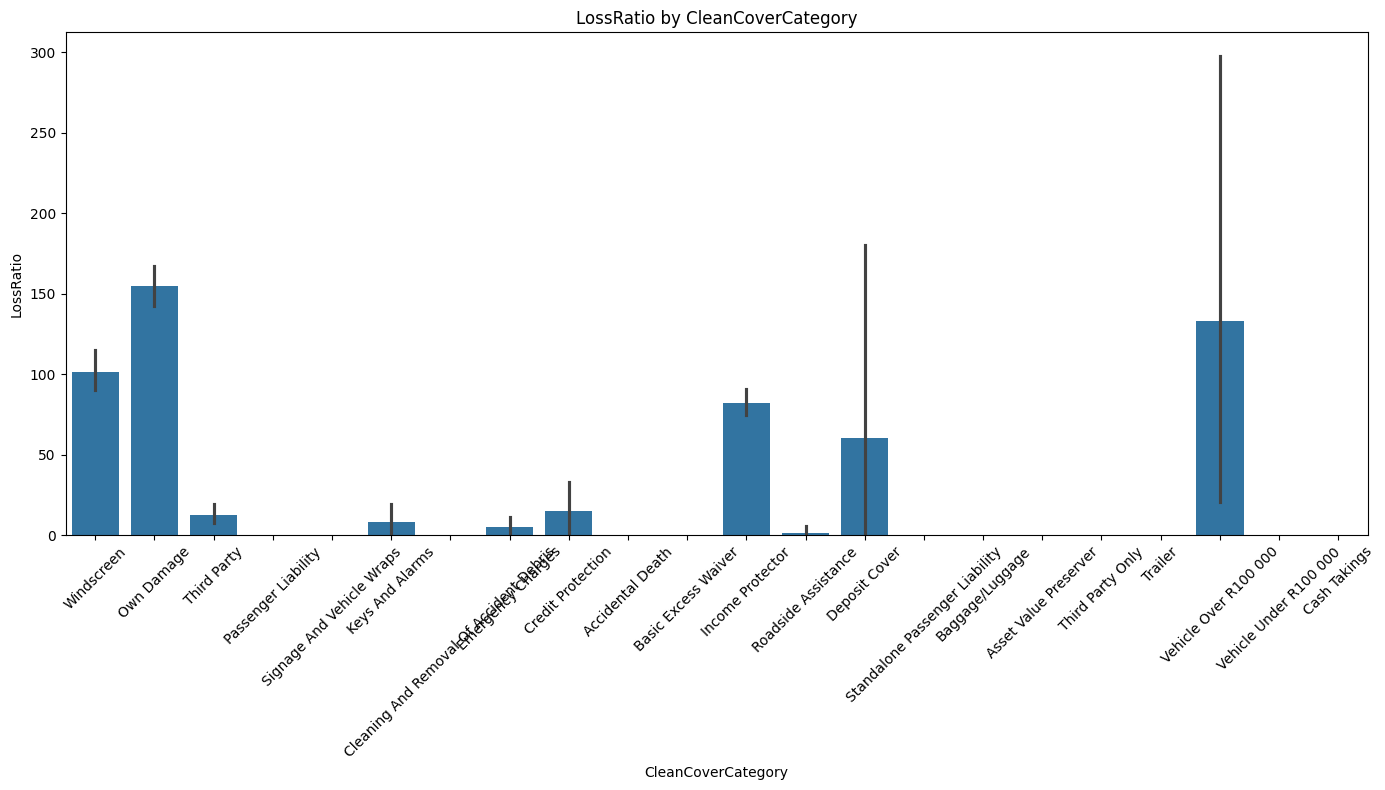

In [6]:
# Example usage
result = run_full_anova(df, group_col='CleanCoverCategory', value_col='LossRatio')

## Test Hypothesis 2 (Vehicle Make and Claim Severity) with T-test

In [8]:

ttest_results_df = analyze_vehicle_make_claims(
    df,
    min_count=50,           # You can tune this
    value_var='TotalClaims',
    group_var='VehicleType',
    top_n_plot=10,
    output_dir='../docs',
    plot_type='violin'      # Or 'box'
)

ttest_results_df.head()


/home/abel/Desktop/Projects/ACIS-Insurance-Analytics/scripts/t_test.py:60: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=subset, x=group_var, y=value_var, inner='box', scale='width')


,Make1,Make2,T-statistic,P-value,Adjusted P-value,Significant
0,Passenger Vehicle,Medium Commercial,-0.924307,3.553327e-01,3.553327e+00,False
1,Passenger Vehicle,Heavy Commercial,-0.696017,4.864560e-01,4.864560e+00,False
2,Passenger Vehicle,Light Commercial,6.173487,7.524289e-10,7.524289e-09,True
3,Passenger Vehicle,Bus,26.327896,1.134442e-152,1.134442e-151,True
4,Medium Commercial,Heavy Commercial,-0.478896,6.320351e-01,6.320351e+00,False
